## Comprehensive Bivariate Analysis

In this section, we investigate how each independent variable relates to customer churn. The analysis is organized into three key dimensions: Demographics, Services, and Financial Behavior, using visualizations and statistical tests to validate relationships.

### 1. Import Dependencies

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import warnings

warnings.filterwarnings('ignore')

### 2. Load Data

In [5]:
df = pd.read_csv('../Data/Processed/Telco_Churn_Class_Univariate_Analysis_Done.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TenureSegment,ServiceUsage,BillingLevel,BillingTenureSegment,EngagementScore,EngagementSegment,BillingEngageSegment,TenureEngageSegment,IsMonthToMonth,HasCoreProtection
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,New,Heavy,Low,Low-New,2,LowEngage,Low-LowEngage,New-LowEngage,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,New,Heavy,Low,Low-New,4,MidEngage,Low-MidEngage,New-MidEngage,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,New,Light,High,High-New,2,LowEngage,High-LowEngage,New-LowEngage,1,0


### 3. Bivariate Analysis

#### 3.1 Churn Vs Demographics 

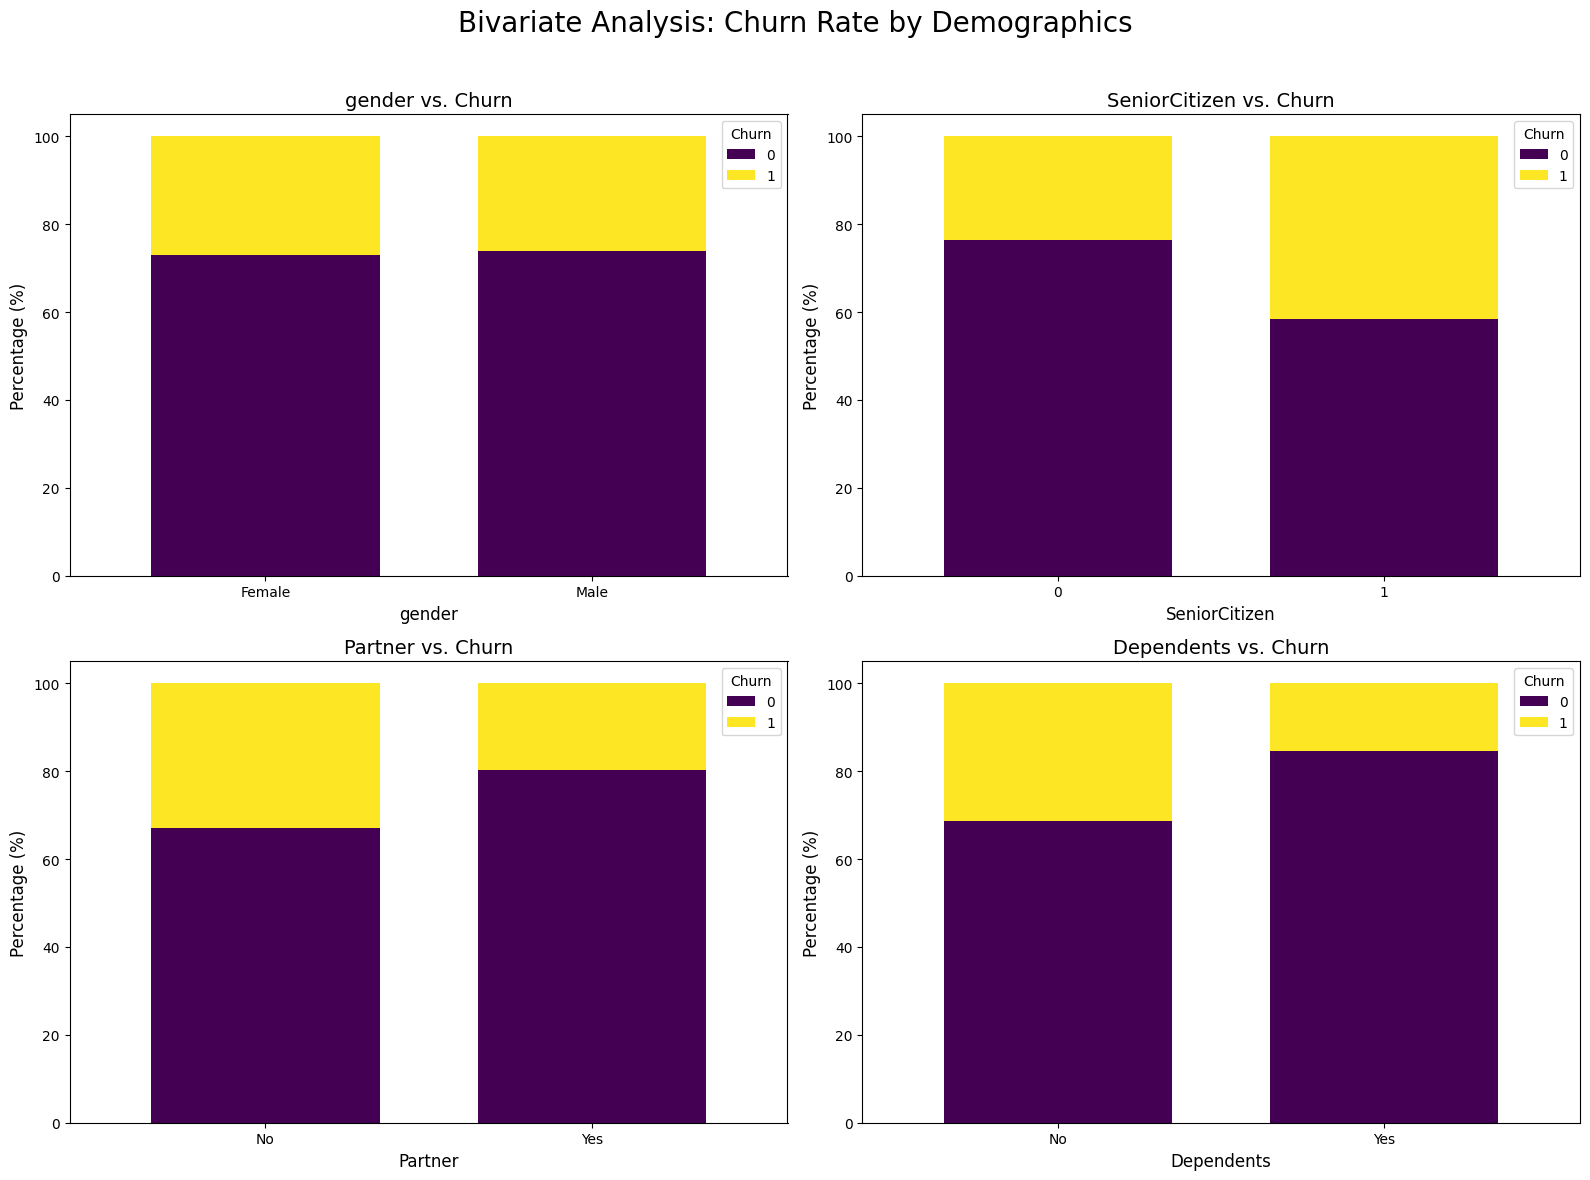

--- Chi-Square Test of Independence for Demographics vs. Churn ---

Analysis for: gender
Hypotheses:
  - Null Hypothesis (H₀): There is NO statistically significant association between gender and Churn.
  - Alternative Hypothesis (H₁): There IS a statistically significant association between gender and Churn.
--------------------------------------------------
Contingency Table:
Churn      0    1
gender           
Female  2549  939
Male    2625  930
--------------------------------------------------
Test Results:
  - P-value: 0.4866
  - Conclusion: Since the p-value (0.4866) is greater than 0.05, we FAIL to REJECT the Null Hypothesis.
  - Finding: The relationship between gender and Churn is not statistically significant.

Analysis for: SeniorCitizen
Hypotheses:
  - Null Hypothesis (H₀): There is NO statistically significant association between SeniorCitizen and Churn.
  - Alternative Hypothesis (H₁): There IS a statistically significant association between SeniorCitizen and Churn.
----

In [12]:


demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# --- 1. Professional Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
fig.suptitle('Bivariate Analysis: Churn Rate by Demographics', fontsize=20)

for i, col in enumerate(demographic_cols):
    ax = axes[i]
    
    # Create a crosstab to calculate percentages
    crosstab_df = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    # Create the stacked bar plot from the crosstab
    crosstab_df.plot(kind='bar', stacked=True, ax=ax, width=0.7, colormap='viridis')
    
    ax.set_title(f'{col} vs. Churn', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.tick_params(axis='x', rotation=0) # Keep x-axis labels horizontal
    ax.legend(title='Churn')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 2. Hypothesis Testing with Clear Results ---
print("--- Chi-Square Test of Independence for Demographics vs. Churn ---")

for col in demographic_cols:
    print("\n" + "="*50)
    print(f"Analysis for: {col}")
    print("="*50)
    
    # Stating the hypotheses
    print("Hypotheses:")
    print(f"  - Null Hypothesis (H₀): There is NO statistically significant association between {col} and Churn.")
    print(f"  - Alternative Hypothesis (H₁): There IS a statistically significant association between {col} and Churn.")
    print("-" * 50)

    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Churn'])
    print("Contingency Table:")
    print(contingency_table)
    print("-" * 50)
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print("Test Results:")
    print(f"  - P-value: {p:.4f}")
    
    # State the conclusion
    alpha = 0.05
    if p < alpha:
        print(f"  - Conclusion: Since the p-value ({p:.4f}) is less than {alpha}, we REJECT the Null Hypothesis.")
        print("  - Finding: The relationship between {} and Churn is statistically significant.".format(col))
    else:
        print(f"  - Conclusion: Since the p-value ({p:.4f}) is greater than {alpha}, we FAIL to REJECT the Null Hypothesis.")
        print("  - Finding: The relationship between {} and Churn is not statistically significant.".format(col))
    print("="*50)

####  Demographics: Age and Family Status are Significant

Significant Predictors: The analysis confirmed that SeniorCitizen, Partner, and Dependents all have a statistically significant relationship with churn (p < 0.05).

- Senior Citizens are significantly more likely to churn.

- Customers with no Partner and no Dependents also have a significantly higher churn rate, suggesting that customers with families are more "sticky."

Non-Significant Predictor: gender was found to have no statistically significant association with churn.


#### 3.2 Churn Vs. Services

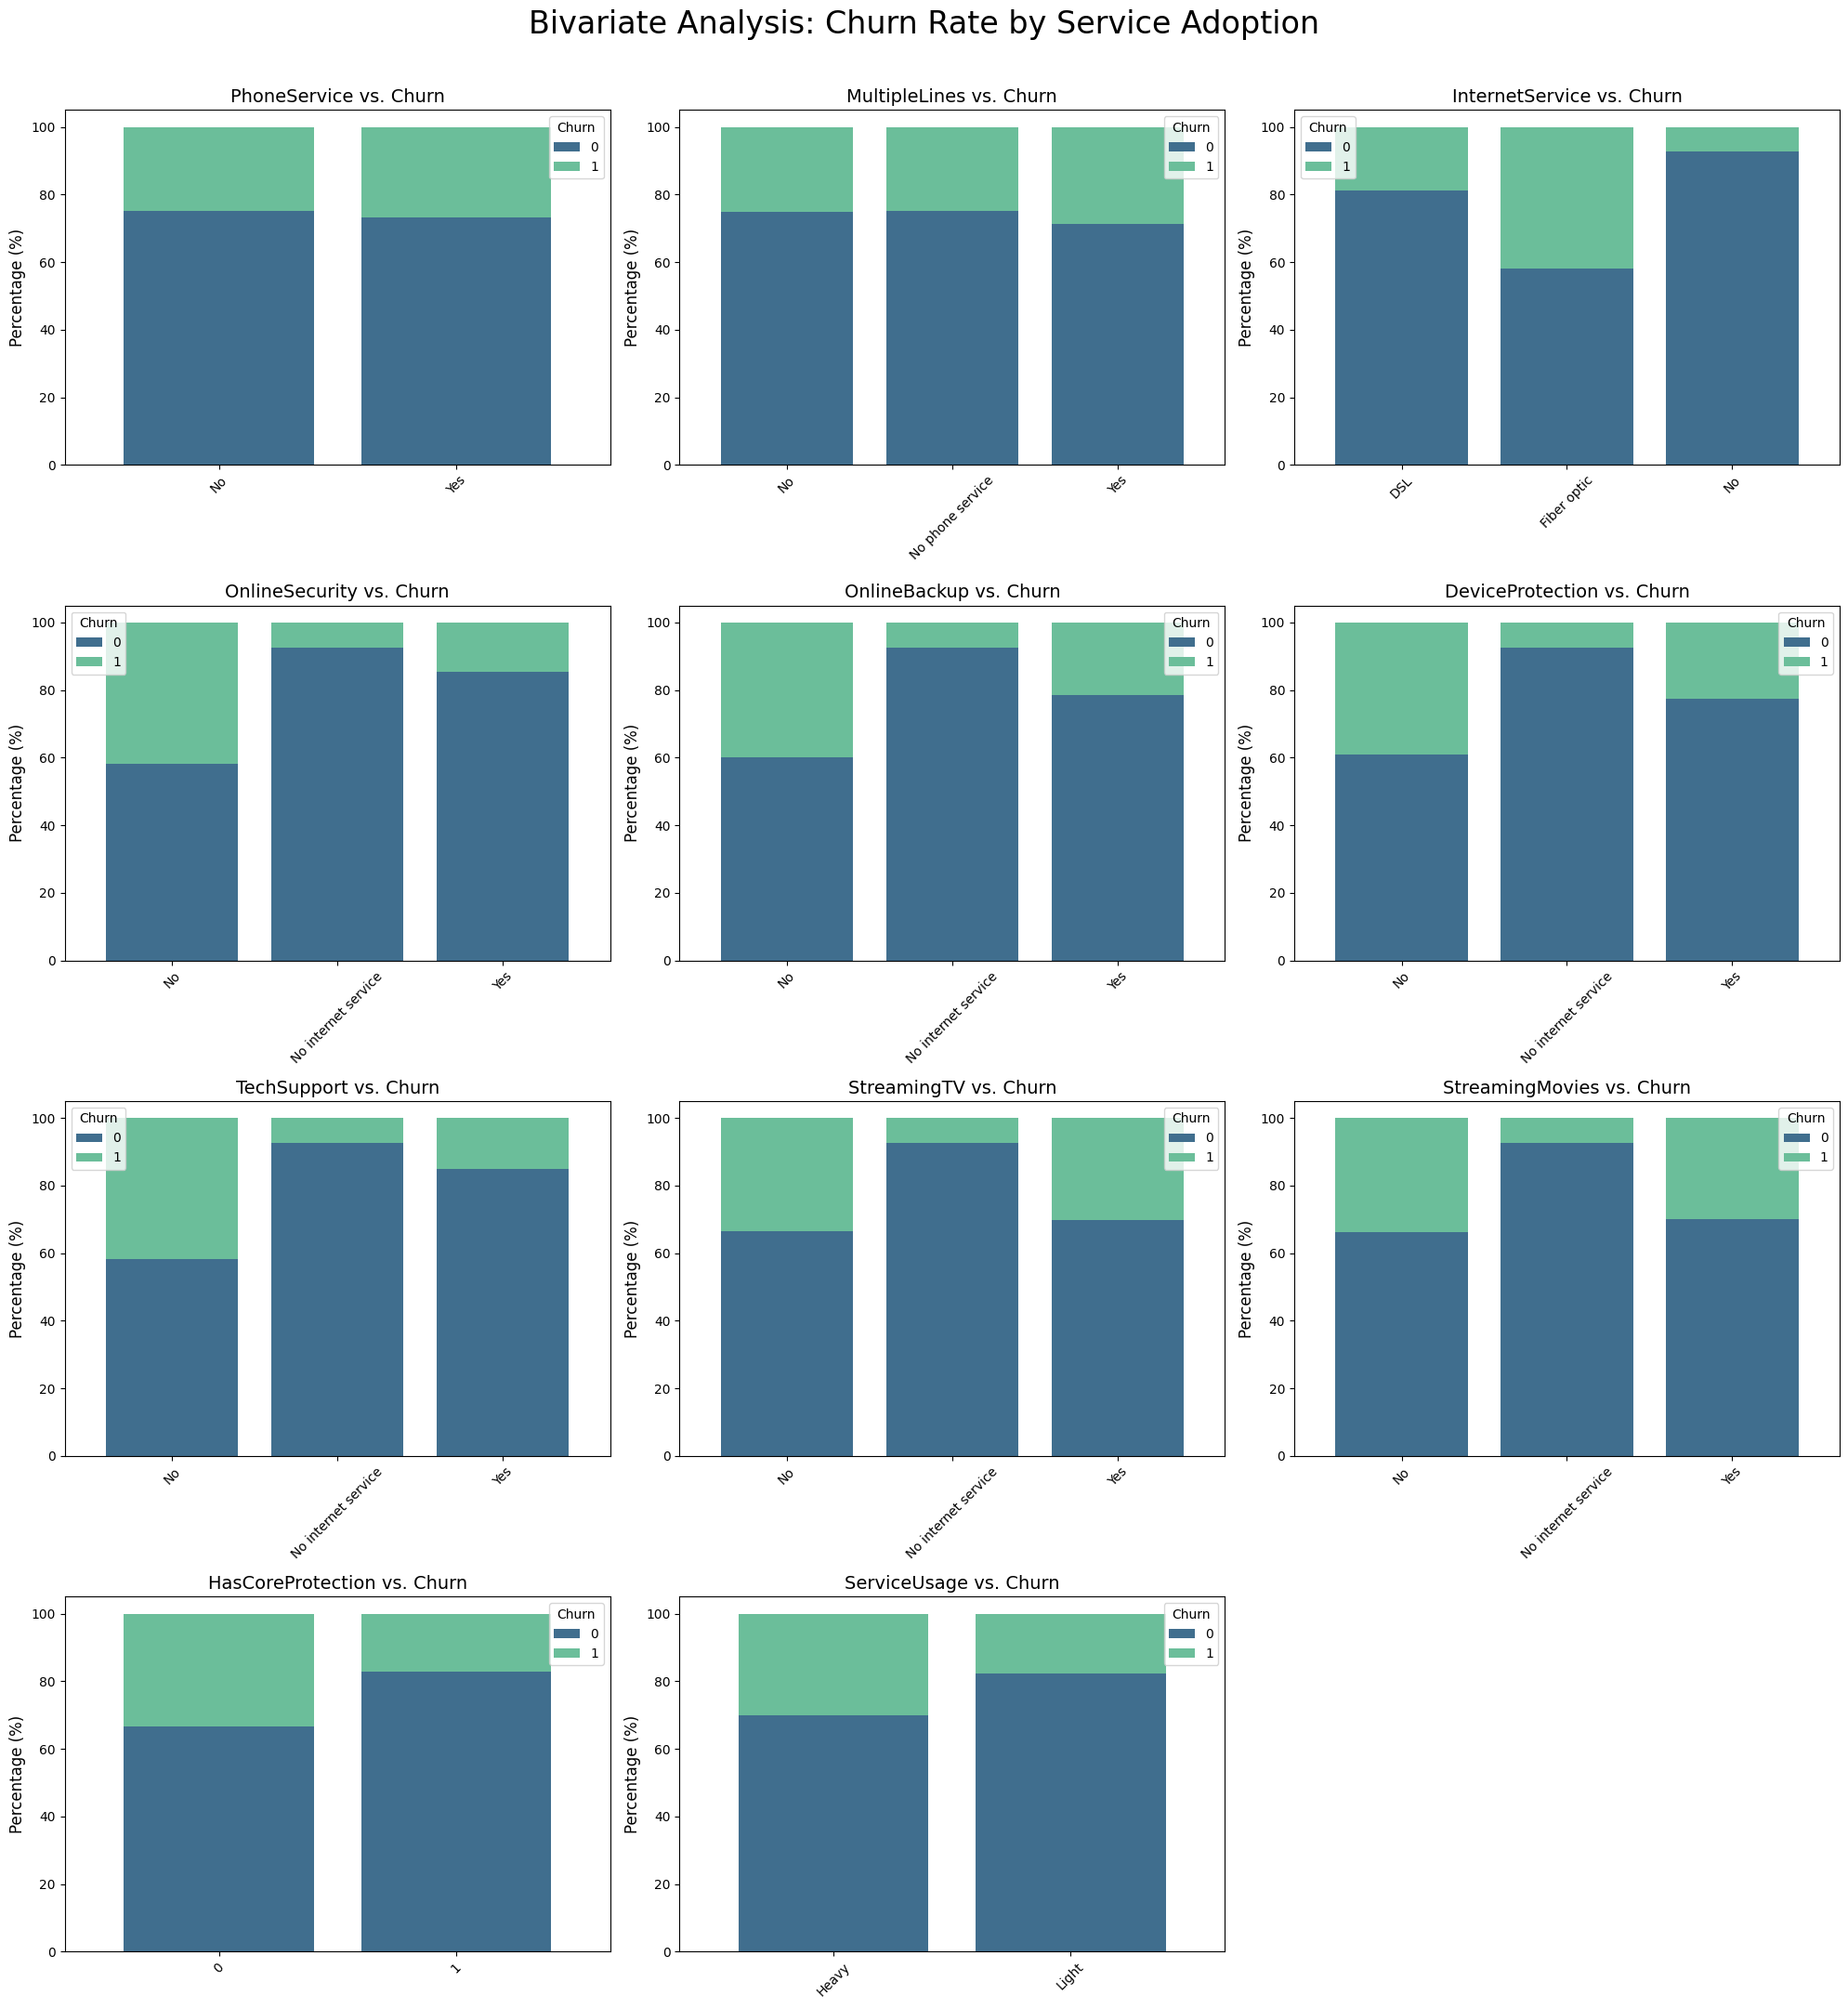

--- Chi-Square Test of Independence for Services vs. Churn ---

Analysis for: PhoneService
Hypotheses:
  - Null Hypothesis (H₀): There is NO statistically significant association between PhoneService and Churn.
  - Alternative Hypothesis (H₁): There IS a statistically significant association between PhoneService and Churn.

Test Results:
  - P-value: 0.3388
  - Conclusion: Since p > 0.05, we FAIL to REJECT the Null Hypothesis.
  - Finding: The relationship between PhoneService and Churn is not statistically significant.

Analysis for: MultipleLines
Hypotheses:
  - Null Hypothesis (H₀): There is NO statistically significant association between MultipleLines and Churn.
  - Alternative Hypothesis (H₁): There IS a statistically significant association between MultipleLines and Churn.

Test Results:
  - P-value: 0.0035
  - Conclusion: Since p < 0.05, we REJECT the Null Hypothesis.
  - Finding: The relationship between MultipleLines and Churn is statistically significant.

Analysis for: Inte

In [17]:
# --- Bivariate Analysis: Churn vs. Services ---

service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'HasCoreProtection', 'ServiceUsage'
]

# --- 1. Visualization ---
fig, axes = plt.subplots(4, 3, figsize=(20, 22))
axes = axes.flatten()
fig.suptitle('Bivariate Analysis: Churn Rate by Service Adoption', fontsize=24)

for i, col in enumerate(service_cols):
    ax = axes[i]
    crosstab_df = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    crosstab_df.plot(kind='bar', stacked=True, ax=ax, width=0.8, color=['#406E8E', '#6BBE9A'])
    
    ax.set_title(f'{col} vs. Churn', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.legend(title='Churn')

# Hide any unused subplots
for j in range(len(service_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# --- 2. Hypothesis Testing ---
print("--- Chi-Square Test of Independence for Services vs. Churn ---")
for col in service_cols:
    print("\n" + "="*50)
    print(f"Analysis for: {col}")
    print("="*50)
    
    print("Hypotheses:")
    print(f"  - Null Hypothesis (H₀): There is NO statistically significant association between {col} and Churn.")
    print(f"  - Alternative Hypothesis (H₁): There IS a statistically significant association between {col} and Churn.")
    
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("\nTest Results:")
    print(f"  - P-value: {p:.4f}")
    
    alpha = 0.05
    if p < alpha:
        print(f"  - Conclusion: Since p < {alpha}, we REJECT the Null Hypothesis.")
        print(f"  - Finding: The relationship between {col} and Churn is statistically significant.")
    else:
        print(f"  - Conclusion: Since p > {alpha}, we FAIL to REJECT the Null Hypothesis.")
        print(f"  - Finding: The relationship between {col} and Churn is not statistically significant.")
    print("="*50)









#### Summary of Findings: Churn vs. Services

- **PhoneService** does not impact churn significantly and shows no clear pattern.

- **InternetService** is a major churn driver — customers with Fiber optic internet are much more likely to churn than those with DSL.

- **Core Protection Services** (OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup) are strongly associated with lower churn — customers with these services are more likely to stay.

- **Streaming Services** (StreamingTV, StreamingMovies) are linked to slightly higher churn, possibly due to their overlap with high-churn Fiber optic users.

- **Engineered Features** like `HasCoreProtection` and `ServiceUsage` proved effective — both are strongly associated with churn and enhance predictive insight.


### 3.3 Churn Vs. Financial

#### A. Categorical Financial Variables

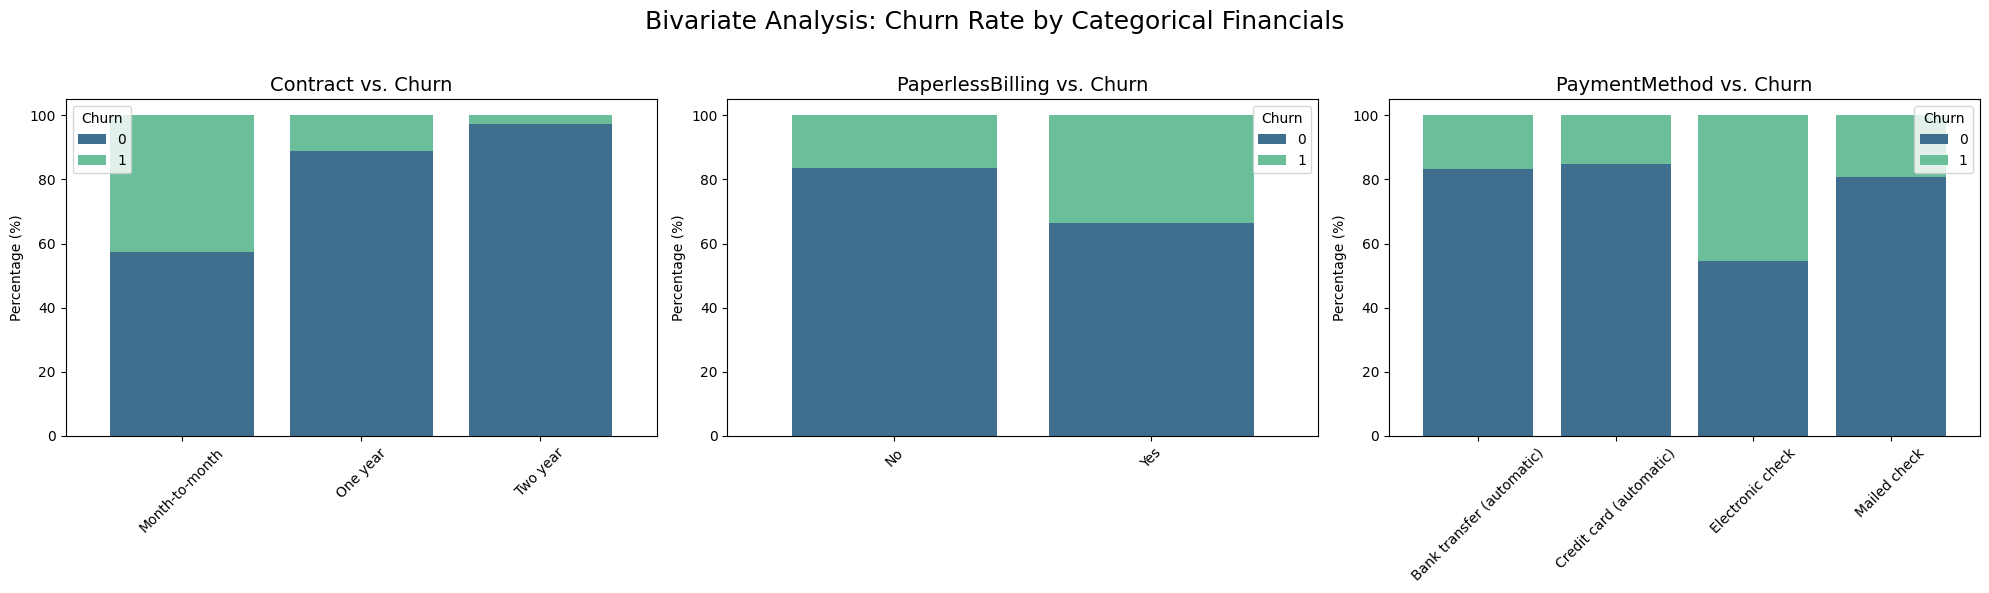

--- Chi-Square Test of Independence for Categorical Financials vs. Churn ---

Analysis for: Contract
H₀: There is NO association between Contract and Churn.
H₁: There IS an association between Contract and Churn.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The relationship is statistically significant.

Analysis for: PaperlessBilling
H₀: There is NO association between PaperlessBilling and Churn.
H₁: There IS an association between PaperlessBilling and Churn.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The relationship is statistically significant.

Analysis for: PaymentMethod
H₀: There is NO association between PaymentMethod and Churn.
H₁: There IS an association between PaymentMethod and Churn.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The relationship is statistically significant.


In [19]:

# Part A: Categorical Financial Variables
categorical_financial_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Visualization for Categorical Financials
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Bivariate Analysis: Churn Rate by Categorical Financials', fontsize=18)
for i, col in enumerate(categorical_financial_cols):
    ax = axes[i]
    crosstab_df = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    crosstab_df.plot(kind='bar', stacked=True, ax=ax, width=0.8, color=['#406E8E', '#6BBE9A'])
    ax.set_title(f'{col} vs. Churn', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Churn')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Hypothesis Testing for Categorical Financials
print("--- Chi-Square Test of Independence for Categorical Financials vs. Churn ---")
for col in categorical_financial_cols:
    print("\n" + "="*50)
    print(f"Analysis for: {col}")
    print("="*50)
    print(f"H₀: There is NO association between {col} and Churn.")
    print(f"H₁: There IS an association between {col} and Churn.")
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nTest Results:")
    print(f"  - P-value: {p:.4f}")
    if p < 0.05:
        print(f"  - Conclusion: REJECT H₀. The relationship is statistically significant.")
    else:
        print(f"  - Conclusion: FAIL to REJECT H₀. The relationship is not statistically significant.")
    print("="*50)



#### B. Numerical Financial Variables

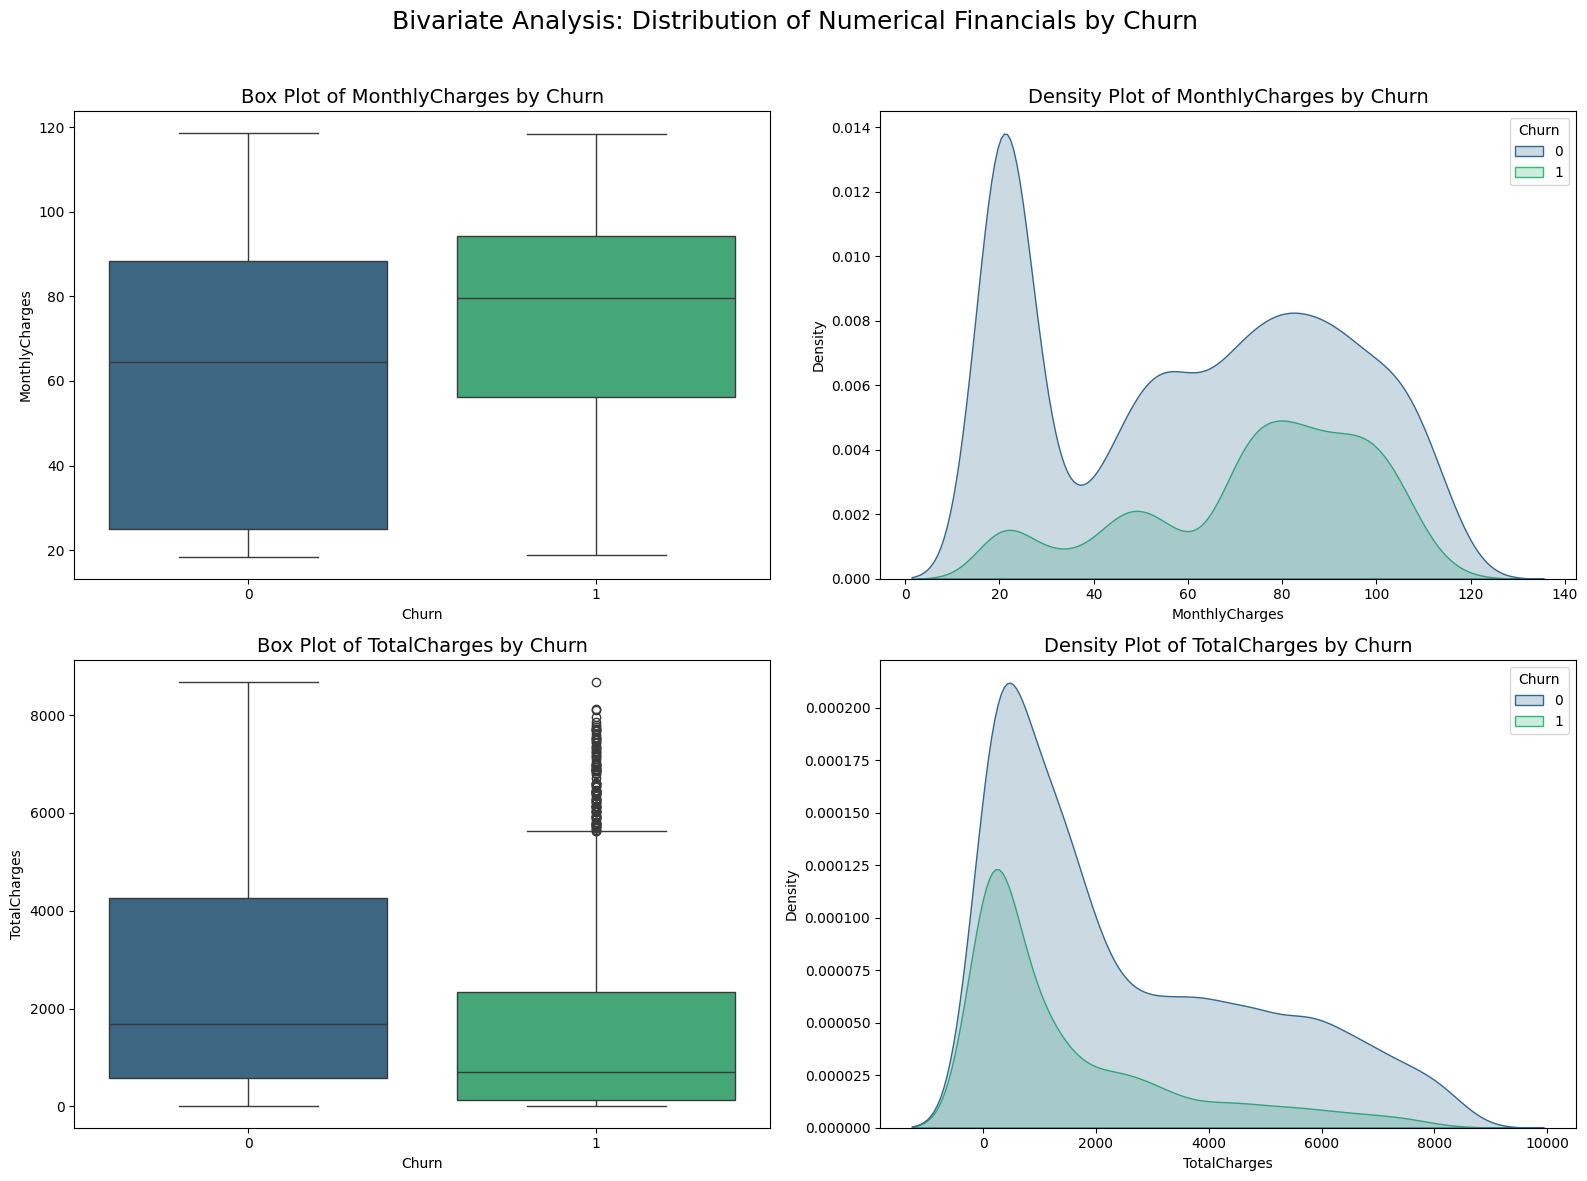


--- Independent Samples t-test for Numerical Financials vs. Churn ---

Analysis for: MonthlyCharges
H₀: The mean MonthlyCharges for customers who churn and who don't are EQUAL.
H₁: The mean MonthlyCharges for customers who churn and who don't are DIFFERENT.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The difference in mean MonthlyCharges is statistically significant.

Analysis for: TotalCharges
H₀: The mean TotalCharges for customers who churn and who don't are EQUAL.
H₁: The mean TotalCharges for customers who churn and who don't are DIFFERENT.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The difference in mean TotalCharges is statistically significant.


In [34]:
# Part B: Numerical Financial Variables
numerical_financial_cols = ['MonthlyCharges', 'TotalCharges']

# Visualization for Numerical Financials
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis: Distribution of Numerical Financials by Churn', fontsize=18)
for i, col in enumerate(numerical_financial_cols):
    # Box Plot
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i, 0], palette='viridis')
    axes[i, 0].set_title(f'Box Plot of {col} by Churn', fontsize=14)
    # KDE Plot
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[i, 1], fill=True, palette='viridis')
    axes[i, 1].set_title(f'Density Plot of {col} by Churn', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Hypothesis Testing for Numerical Financials
print("\n--- Independent Samples t-test for Numerical Financials vs. Churn ---")
for col in numerical_financial_cols:
    print("\n" + "="*50)
    print(f"Analysis for: {col}")
    print("="*50)
    print(f"H₀: The mean {col} for customers who churn and who don't are EQUAL.")
    print(f"H₁: The mean {col} for customers who churn and who don't are DIFFERENT.")
    
    churn_yes = df[df['Churn'] == 1][col].dropna()
    churn_no = df[df['Churn'] == 0][col].dropna()
    
    t_stat, p_value = ttest_ind(churn_yes, churn_no)
    
    print("\nTest Results:")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  - Conclusion: REJECT H₀. The difference in mean {col} is statistically significant.")
    else:
        print(f"  - Conclusion: FAIL to REJECT H₀. The difference in mean {col} is not statistically significant.")
    print("="*50)


##### Visual Insights from the Plots

The visualizations reveal distinct patterns between customers who churned and those who stayed:

- **`MonthlyCharges`**:  
  - Customers who **churn** tend to have **higher median monthly charges**.  
  - Box plots and KDE plots show a **right-shifted distribution** for churners, indicating higher monthly fees are associated with increased churn.

- **`TotalCharges`**:  
  - In contrast, churners show a **significantly lower median total charge**.  
  - The distribution is compressed near the lower end with many outliers, suggesting most churners are **new customers** who haven’t yet accumulated large charges.

---

##### Choosing the Right Statistical Test

While the visual evidence is strong, we must validate our findings statistically.

##### Why Not a t-test?

- A t-test compares the **means** of two groups under the assumption of **normality**.
- Our `TotalCharges` variable is **heavily skewed** and contains **many outliers**, violating t-test assumptions.
- The mean is not a reliable central tendency measure here.

##### Better Alternative: Mann-Whitney U Test

- A **non-parametric** test that compares **medians** and **distributions**.
- Makes **no assumptions** about the shape of the distribution.
- More **robust to skewed data and outliers**.

> **Conclusion:** Due to the skewed distribution and outliers in `TotalCharges`, the **Mann-Whitney U test** is the appropriate choice for testing differences in both `MonthlyCharges` and `TotalCharges` across churn groups.

---



### 3.4 Mann-Whitney U test for the numerical variables

In [38]:

numerical_financial_cols = ['MonthlyCharges', 'TotalCharges']
print("\n\n--- Mann-Whitney U Test: Numerical Financials vs. Churn ---")
for col in numerical_financial_cols:
    print("\n" + "="*60)
    print(f"Analysis for: {col}")
    print("="*60)
    print(f"H₀: The distributions of {col} for customers who churn and who don't are EQUAL.")
    print(f"H₁: The distributions of {col} for customers who churn and who don't are DIFFERENT.")
    
    churn_yes = df[df['Churn'] == 1][col].dropna()
    churn_no = df[df['Churn'] == 0][col].dropna()
    
    stat, p_value = mannwhitneyu(churn_yes, churn_no)
    
    print("\nTest Results:")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  - Conclusion: REJECT H₀. The difference in distributions is statistically significant.")
    else:
        print(f"  - Conclusion: FAIL to REJECT H₀. The difference in distributions is not statistically significant.")
    print("="*60)



--- Mann-Whitney U Test: Numerical Financials vs. Churn ---

Analysis for: MonthlyCharges
H₀: The distributions of MonthlyCharges for customers who churn and who don't are EQUAL.
H₁: The distributions of MonthlyCharges for customers who churn and who don't are DIFFERENT.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The difference in distributions is statistically significant.

Analysis for: TotalCharges
H₀: The distributions of TotalCharges for customers who churn and who don't are EQUAL.
H₁: The distributions of TotalCharges for customers who churn and who don't are DIFFERENT.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The difference in distributions is statistically significant.


#### Summary of Findings: Churn vs. Financials

- **Contract Type** is a strong churn predictor — customers on Month-to-month contracts are far more likely to churn than those on longer-term plans.

- **Payment Method** matters — those paying via Electronic check churn at higher rates compared to users of other payment options.

- **Paperless Billing** users tend to churn more often, suggesting a possible link between digital billing behavior and disengagement.

- **Monthly Charges** are higher among churners, reinforcing the idea that cost sensitivity may drive customer loss.

- **Total Charges** are lower among churners, indicating they are often newer customers who haven’t yet built up long-term value.


### 4. New Advanced Feature Engineering opportunities Based on the findings of Bivariate Analysis


- **HighRiskFinancialProfile**:  
  A binary feature indicating whether a customer has both:
  - A Month-to-month contract  
  - Uses Electronic check as the payment method  
  These customers are known to have a significantly higher risk of churn.

- **RiskScore**:  
  A composite numerical feature (ranging from 0 to 5) that assigns one point for each high-risk trait:
  - Is a Senior Citizen (+1)
  - Has no Dependents (+1)
  - Is on a Month-to-month contract (+1)
  - Has Fiber optic Internet service (+1)
  - Does not have CoreProtection (+1)  
  This score summarizes a customer's overall churn risk based on multiple statistically significant factors.


In [40]:
# --- Feature Engineering: Creating Advanced Features ---

# Feature 1: HighRiskFinancialProfile
# Flag for customers with both a month-to-month contract and paying by electronic check.
df['HighRiskFinancialProfile'] = ((df['Contract'] == 'Month-to-month') & 
                                 (df['PaymentMethod'] == 'Electronic check')).astype(int)

# Feature 2: OverallRiskScore
# A cumulative score based on several high-risk factors identified in the analysis.
# Note: We assume 'HasCoreProtection' was already created.
risk_score = (
    (df['SeniorCitizen'] == 1).astype(int) +
    (df['Dependents'] == 'No').astype(int) +
    (df['Contract'] == 'Month-to-month').astype(int) +
    (df['InternetService'] == 'Fiber optic').astype(int) +
    (df['HasCoreProtection'] == 0).astype(int)
)
df['OverallRiskScore'] = risk_score

# --- Verification ---
# Display the distribution of the new features to verify their creation.
print("Distribution of 'HighRiskFinancialProfile':")
print(df['HighRiskFinancialProfile'].value_counts())
print("\n" + "="*40 + "\n")
print("Distribution of 'OverallRiskScore':")
print(df['OverallRiskScore'].value_counts().sort_index())

Distribution of 'HighRiskFinancialProfile':
HighRiskFinancialProfile
0    5193
1    1850
Name: count, dtype: int64


Distribution of 'OverallRiskScore':
OverallRiskScore
0     451
1    1463
2    1795
3    1733
4    1132
5     469
Name: count, dtype: int64


In [41]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,BillingLevel,BillingTenureSegment,EngagementScore,EngagementSegment,BillingEngageSegment,TenureEngageSegment,IsMonthToMonth,HasCoreProtection,HighRiskFinancialProfile,OverallRiskScore
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Low,Low-New,2,LowEngage,Low-LowEngage,New-LowEngage,1,0,1,3
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage,0,1,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Low,Low-New,4,MidEngage,Low-MidEngage,New-MidEngage,1,1,0,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage,0,1,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,High,High-New,2,LowEngage,High-LowEngage,New-LowEngage,1,0,1,4


### 5. Analysis of Engineered Features

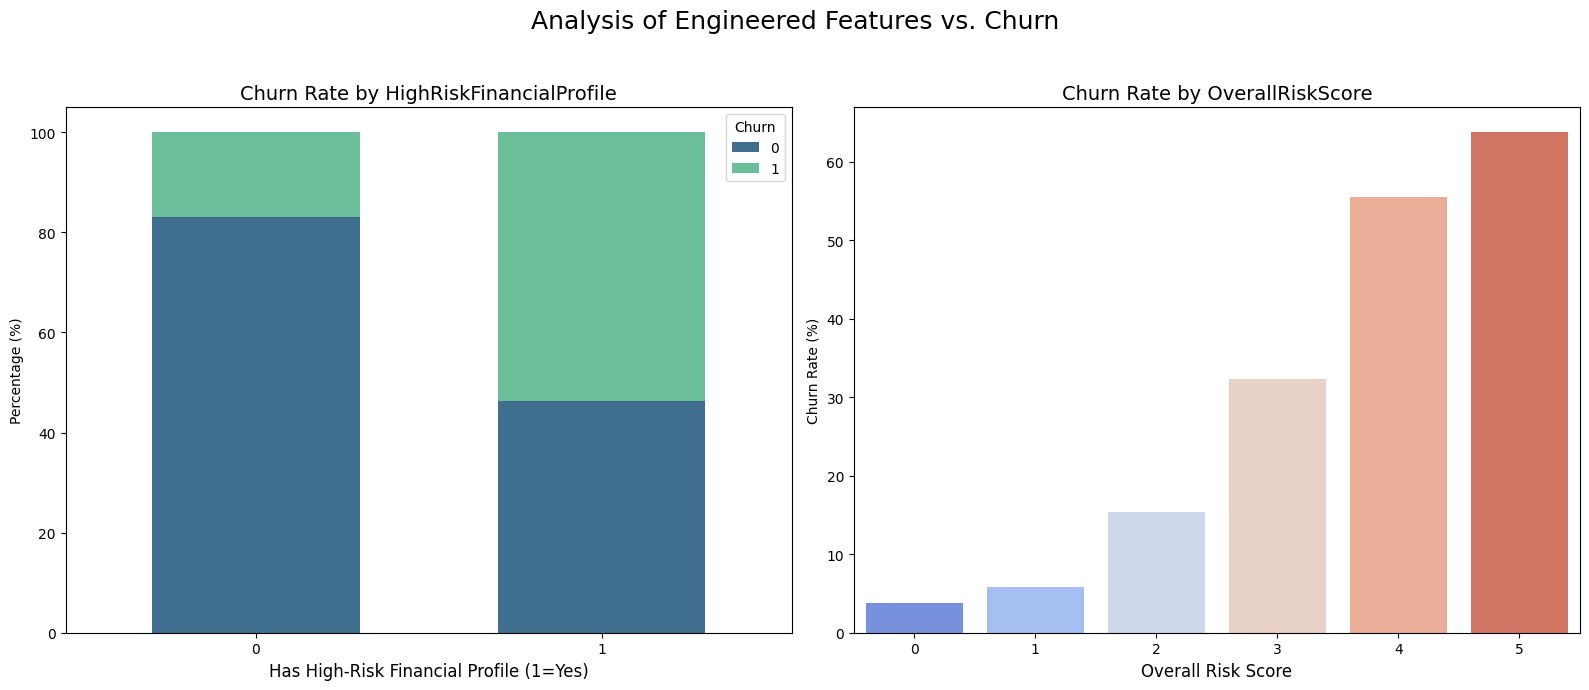

--- Chi-Square Test for Engineered Features vs. Churn ---

Analysis for: HighRiskFinancialProfile
H₀: There is NO association between HighRiskFinancialProfile and Churn.
H₁: There IS an association between HighRiskFinancialProfile and Churn.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The relationship is statistically significant.

Analysis for: OverallRiskScore
H₀: There is NO association between OverallRiskScore and Churn.
H₁: There IS an association between OverallRiskScore and Churn.

Test Results:
  - P-value: 0.0000
  - Conclusion: REJECT H₀. The relationship is statistically significant.


In [42]:

# 1. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Analysis of Engineered Features vs. Churn', fontsize=18)

# Plot for HighRiskFinancialProfile
crosstab_df = pd.crosstab(df['HighRiskFinancialProfile'], df['Churn'], normalize='index') * 100
crosstab_df.plot(kind='bar', stacked=True, ax=axes[0], width=0.6, color=['#406E8E', '#6BBE9A'])
axes[0].set_title('Churn Rate by HighRiskFinancialProfile', fontsize=14)
axes[0].set_xlabel('Has High-Risk Financial Profile (1=Yes)', fontsize=12)
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=0)

# Plot for OverallRiskScore
# Calculate churn rate for each score
risk_churn_rate = df.groupby('OverallRiskScore')['Churn'].mean() * 100
sns.barplot(x=risk_churn_rate.index, y=risk_churn_rate.values, ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn Rate by OverallRiskScore', fontsize=14)
axes[1].set_xlabel('Overall Risk Score', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Hypothesis Testing
features_to_test = ['HighRiskFinancialProfile', 'OverallRiskScore']
print("--- Chi-Square Test for Engineered Features vs. Churn ---")
for col in features_to_test:
    print("\n" + "="*60)
    print(f"Analysis for: {col}")
    print("="*60)
    print(f"H₀: There is NO association between {col} and Churn.")
    print(f"H₁: There IS an association between {col} and Churn.")
    
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("\nTest Results:")
    print(f"  - P-value: {p:.4f}")
    if p < 0.05:
        print(f"  - Conclusion: REJECT H₀. The relationship is statistically significant.")
    else:
        print(f"  - Conclusion: FAIL to REJECT H₀. The relationship is not statistically significant.")
    print("="*60)

#### Results of Engineered Features

This section validates the effectiveness of the engineered features derived from earlier bivariate analysis.

- **HighRiskFinancialProfile**  
  This binary feature, which flags customers with both a Month-to-month contract and Electronic check as their payment method, shows a strong association with churn.  
  - **Statistical Validation**: The Chi-Square test confirms a highly significant relationship with churn (p < 0.001).  
  - **Visual Insight**: Customers flagged with this profile exhibit a much higher churn rate than those without.

- **OverallRiskScore**  
  This composite score (ranging from 0 to 5) combines multiple high-risk characteristics into a single numerical feature.  
  - **Statistical Validation**: Strong statistical significance was confirmed (p < 0.001).  
  - **Visual Insight**: The churn rate increases steadily with the score, indicating effective segmentation of churn risk.

These results confirm that both engineered features are interpretable, predictive, and valuable additions to the modeling pipeline.


#### `Key Takeaways of Bivariate Analysis`

- **Demographics**: Senior citizens and customers without families are more prone to churn.
- **Services**: Lack of protective services and use of fiber optic internet increase churn risk.
- **Financials**: High monthly cost and use of digital/automated payment methods are linked to churn.
- **Engineered Features**: Provide compact and powerful predictors, combining several risk factors into interpretable metrics.

In [43]:
df.to_csv('../Data/Processed/Telco_Churn_Class_Bivariate_Analysis_Done.csv', index=False)